In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
pwd

'C:\\Users\\ABIARYAA'

In [9]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [11]:
X = dataset.iloc[:, 1:2].values.reshape(-1,1)
y =dataset.iloc[:, -1].values

In [12]:
X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

In [14]:
#Since dataset is small, dont need to split
#Lets compare polynomial with linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#Now Polynomial
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)                   #Fit polynomial of degree 2
X_poly = poly_reg.fit_transform(X)                          #Fit the model and transform X and store in X_poly
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [33]:
#Column 1 is for b0 created by default in Polynomial Linear regression (its not present in Multiple Linear Regression)

In [34]:
#Now create another Linear model for fitting X_poly to y
linreg2 = LinearRegression()
linreg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

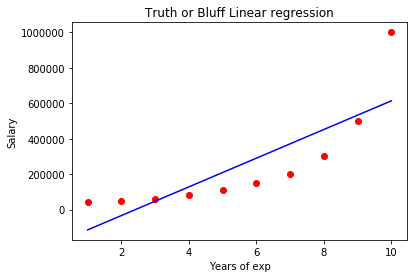

In [35]:
#See what happens if we plot linear regression
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color ='blue')
plt.title('Truth or Bluff Linear regression')
plt.xlabel('Years of exp')
plt.ylabel('Salary')
plt.show()

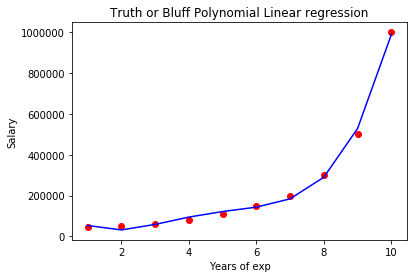

In [36]:
#See what happens if we plot polynomial regression
plt.scatter(X, y, color = 'red')
plt.plot(X, linreg2.predict(poly_reg.fit_transform(X)), color ='blue')
plt.title('Truth or Bluff Polynomial Linear regression')
plt.xlabel('Years of exp')
plt.ylabel('Salary')
plt.show()

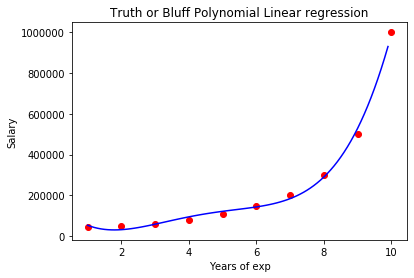

In [42]:
#Prev curves increments by default 1 unit in X axis and it looks at some places like it fits st.lines
#Hence, make X increment by 0.1
X_grid = np.arange(min(X), max(X), 0.1)
X_grid =X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, linreg2.predict(poly_reg.fit_transform(X_grid)), color ='blue')
plt.title('Truth or Bluff Polynomial Linear regression')
plt.xlabel('Years of exp')
plt.ylabel('Salary')
plt.show()

In [49]:
#Predict salary for 6.5 yr exp person through linear reg
lin_reg.predict([[6.5]])

array([330378.78787879])

In [54]:
#Predict salary for 6.5 yr exp person through polynomial linear reg
linreg2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265153])